In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from Scores import *
from create_dataframe import *
from create_dataframe_regression import * 
from logistic_regression import *
import time
import warnings
warnings.filterwarnings("ignore")
from Random_forest import *
from GradientBoosting import *
from logistic_regression_l2 import * 
#from logistic_regression_optimise import * 


C:\Users\Tristan\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dfreg=pd.read_csv("dataframe_regression.csv")

In [3]:
dfreg

,Unnamed: 0,sender_id,receiver_id,receveur_potentiel,passe,passe_id,score1_distance,score2,score3,score4,premiere_distance_receveur,seconde_distance_receveur,premiere_distance_sender,seconde_distance_sender,distance_ligne_passe,adversaire_dans_cone,Direction_Passe
0,0,26,18,1,0,1,2392.822601,2392.822601,2392.822601,1690.822601,2652.168924,2697.572983,814.923309,852.349693,1393.417129,0,1
1,1,11,14,1,0,2,1198.540779,2098.540779,2098.540779,1777.540779,502.493781,1884.701568,1388.092216,1646.147017,147.178972,1,1
2,2,4,10,1,0,3,1290.155029,2190.155029,2190.155029,2184.155029,330.151480,910.659102,297.321375,960.052082,4.883134,1,1
3,3,12,7,1,0,4,600.083328,1500.083328,1500.083328,1428.083328,50.000000,700.642562,370.000000,648.845128,11.498403,1,1
4,4,15,24,1,0,5,100000.000000,100000.000000,100000.000000,100000.000000,0.000000,0.000000,735.459040,810.246876,0.000000,0,0
5,5,26,18,1,0,6,7481.797912,7481.797912,7481.797912,5240.797912,6570.547922,6946.920181,89.442719,372.155881,80.074336,1,1
6,6,2,1,1,1,7,1218.277472,1218.277472,1218.277472,975.277472,871.435597,876.413145,926.336872,961.873173,97.432648,0,1
7,7,26,18,1,0,8,5307.522963,5307.522963,5307.522963,3786.522963,4005.221592,5286.898902,278.926514,1316.852308,1303.941603,0,1
8,8,14,7,1,0,9,3259.831284,3259.831284,3259.831284,3031.831284,1237.133784,1760.255663,1179.025021,1830.000000,15.276864,1,1
9,9,18,21,1,0,10,2875.621672,2875.621672,2875.621672,2533.621672,1669.730517,2536.178227,1943.656348,2429.855963,1595.341990,0,0


In [4]:
PasFaite=dfreg[dfreg['passe']==0]
Faite=dfreg[dfreg['passe']==1]
np.sum(Faite['adversaire_dans_cone'])

3162

In [5]:
dfregOverSample10=pd.concat([dfreg,Faite,Faite,Faite,Faite,Faite,Faite,Faite,Faite,Faite,Faite])
dfregOverSample10.to_csv("dataframe_regression_OverSamp.csv")

110429

In [2]:
tous_scores, moyenne_scores , matrices_coefs = regression_logistique_OverSamp (10, 0.7)
tous_scores

['receiver_id', 'receveur_potentiel', 'passe', 'passe_id', 'score1_distance', 'score2', 'score3', 'score4', 'premiere_distance_receveur', 'seconde_distance_receveur', 'distance_ligne_passe', 'adversaire_dans_cone', 'Direction_Passe']


array([0.35325365, 0.36918991, 0.35856574, 0.35922975, 0.35823373,
       0.35258964, 0.3502656 , 0.34296149, 0.36387782, 0.35358566])

255 642
62 649
528 718
90 729
80 818
317 552
291 328
159 525
215 865
443 843
5 811
319 1015
112 709
265 872
142 775
75 846
249 760
400 698
194 578
397 876
218 864
44 785


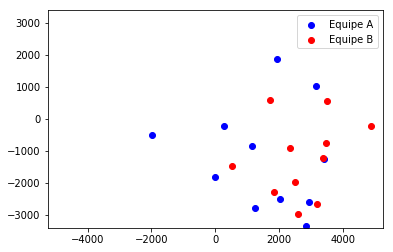

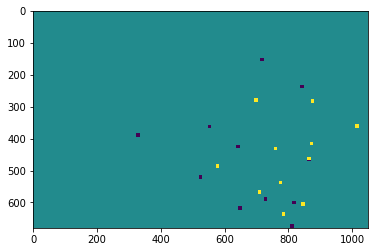

In [4]:
df=pd.read_csv("passes.csv")
df=df.replace(np.nan, 100000)
dfligne=df.iloc[40]
imageC=image(dfligne,True)
plt.imshow(imageC)

<font color='blue'>
On regarde ce que nous renvoie notre fonction directionPasse

Backward


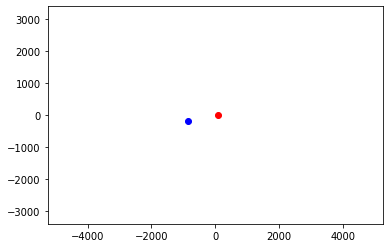

Forward


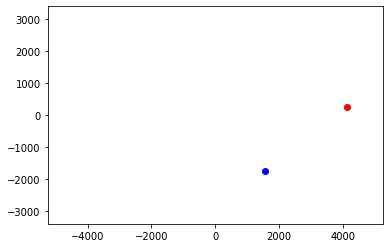

Forward


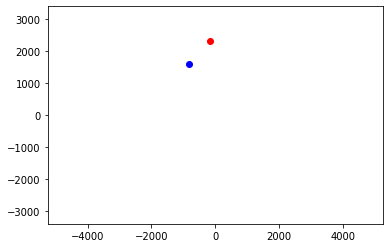

Forward


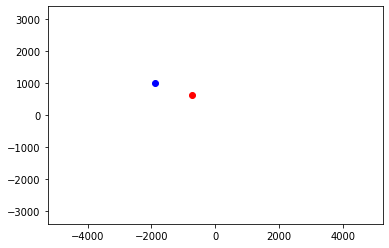

Forward


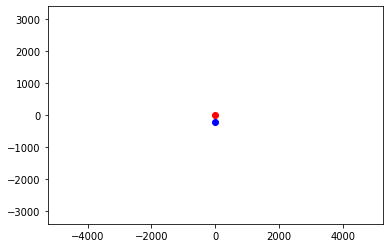

Backward


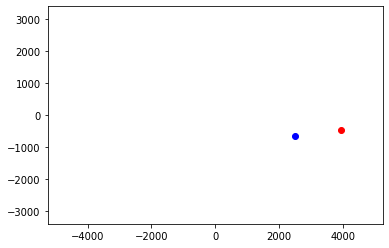

Forward


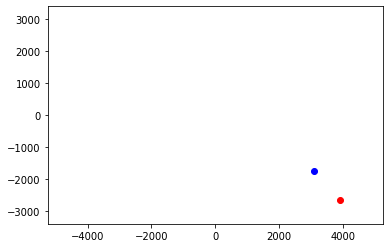

Backward


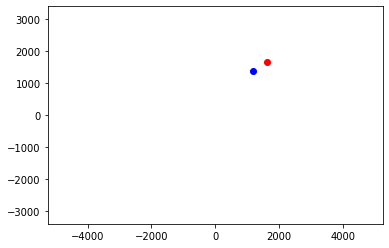

Forward


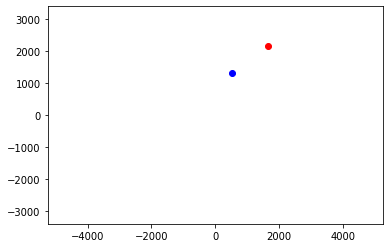

Backward


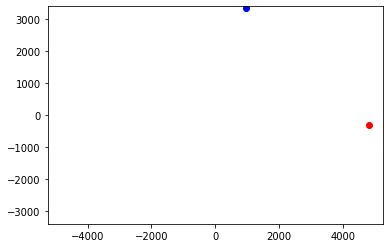

In [29]:
for i in range(10):
    ligne = df.iloc[i]
    sender = df.iloc[i,2]
    receiver = df.iloc[i,3]
    SenderX,SenderY=df.iloc[i,3+sender],df.iloc[i,31+sender]
    ReceiverX,ReceiverY=df.iloc[i,3+receiver],df.iloc[i,31+receiver]
    xmin,xmax,ymin,ymax = -5250, 5250, -3400, 3400
    print(DirectionPasse(ligne))
    plt.scatter(SenderX,SenderY, color='red')
    plt.scatter(ReceiverX,ReceiverY, color='blue')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

<font color='blue'>
Cela semble marcher

<font color='blue'>
  test taux de réussite score1

In [30]:
reussite1 = np.mean(df["predic1"]==df["receiver_id"])
reussite1

0.331507122223329

<font color='blue'>
    score2

In [31]:
reussite2 = np.mean(df["predic2"]==df["receiver_id"])
reussite2

0.39645383006275525

<Font color='blue'>
 score3

In [32]:
reussite3 = np.mean(df["predic3"]==df["receiver_id"])
reussite3

0.39685227612311985

<font color='blue'>
    score4

In [33]:
reussite4 = np.mean(df["predic4"]==df["receiver_id"])
reussite4

0.3831058870405419

<font color = blue>
Ici on crée le dataframe pour la régression logistique

In [4]:
dfreg

,Unnamed: 0,sender_id,receiver_id,receveur_potentiel,passe,passe_id,score1_distance,score2,score3,score4,premiere_distance_receveur,seconde_distance_receveur,premiere_distance_sender,seconde_distance_sender,distance_ligne_passe,adversaire_dans_cone,Direction_Passe
0,0,26,18,1,0,1,2392.822601,2392.822601,2392.822601,1690.822601,2652.168924,2697.572983,814.923309,852.349693,1393.417129,0,1
1,1,11,14,1,0,2,1198.540779,2098.540779,2098.540779,1777.540779,502.493781,1884.701568,1388.092216,1646.147017,147.178972,1,1
2,2,4,10,1,0,3,1290.155029,2190.155029,2190.155029,2184.155029,330.151480,910.659102,297.321375,960.052082,4.883134,1,1
3,3,12,7,1,0,4,600.083328,1500.083328,1500.083328,1428.083328,50.000000,700.642562,370.000000,648.845128,11.498403,1,1
4,4,15,24,1,0,5,100000.000000,100000.000000,100000.000000,100000.000000,0.000000,0.000000,735.459040,810.246876,0.000000,0,0
5,5,26,18,1,0,6,7481.797912,7481.797912,7481.797912,5240.797912,6570.547922,6946.920181,89.442719,372.155881,80.074336,1,1
6,6,2,1,1,1,7,1218.277472,1218.277472,1218.277472,975.277472,871.435597,876.413145,926.336872,961.873173,97.432648,0,1
7,7,26,18,1,0,8,5307.522963,5307.522963,5307.522963,3786.522963,4005.221592,5286.898902,278.926514,1316.852308,1303.941603,0,1
8,8,14,7,1,0,9,3259.831284,3259.831284,3259.831284,3031.831284,1237.133784,1760.255663,1179.025021,1830.000000,15.276864,1,1
9,9,18,21,1,0,10,2875.621672,2875.621672,2875.621672,2533.621672,1669.730517,2536.178227,1943.656348,2429.855963,1595.341990,0,0


<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE SANS OPTIMISATION

In [5]:
tous_scores, moyenne_scores , matrices_coefs = regression_logistique (10, 0.7)

In [6]:
tous_scores 

array([0.42861886, 0.437583  , 0.41699867, 0.41932271, 0.42164675,
       0.41998672, 0.41633466, 0.41035857, 0.41500664, 0.42629482])

In [7]:
moyenne_scores

0.42121513944223105

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE L1

In [8]:
x, y, z, h = regression_logistique (10, 0.7)

In [9]:
x

array([0.42330677, 0.41367862, 0.42231076, 0.40371846, 0.41500664,
       0.43426295, 0.42662683, 0.42961487, 0.41434263, 0.42795485])

In [10]:
y

0.42108233731739714

In [11]:
z

array([[-3.89910886e-04, -7.32555354e-04, -5.81192915e-04,
         6.51884610e-04,  8.52853365e-04, -3.74267795e-04,
        -1.27486678e-05, -3.52540885e-01,  3.98845851e-02],
       [-4.08575653e-04, -6.34109435e-04, -6.23007730e-04,
         6.05279353e-04,  8.59684322e-04, -3.70979402e-04,
        -1.19239673e-05, -3.75657686e-01,  7.76145320e-02],
       [-4.02806816e-04, -6.05714237e-04, -6.99123942e-04,
         6.58014143e-04,  8.39535424e-04, -3.55528791e-04,
        -1.37082584e-05, -3.90073042e-01,  4.70699812e-02],
       [-4.37382742e-04, -6.46549146e-04, -7.37356668e-04,
         7.46650016e-04,  8.63699690e-04, -3.43978706e-04,
        -1.45326862e-05, -3.98564217e-01,  4.96673660e-02],
       [-3.81419469e-04, -6.82822173e-04, -6.42012272e-04,
         6.56239582e-04,  8.29584414e-04, -3.60541513e-04,
        -1.33075095e-05, -3.95455901e-01,  5.98483147e-02],
       [-3.82997408e-04, -6.59639854e-04, -6.63308608e-04,
         6.66020044e-04,  8.36716864e-04, -3.645166

In [12]:
h

array([-4.06041860e-04, -6.57474145e-04, -6.66285206e-04,  6.77417671e-04,
        8.40985663e-04, -3.51468449e-04, -1.33126389e-05, -3.77896474e-01,
        5.23711744e-02])

<BarContainer object of 9 artists>

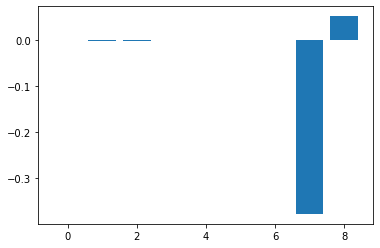

In [13]:
plt.bar(range(9),h)

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE L2

In [3]:
x, y, z, h = regression_logistique_l2(10, 0.7)

In [4]:
x

array([0.41035857, 0.41567065, 0.41766268, 0.42065073, 0.40969456,
       0.4186587 , 0.40770252, 0.42297477, 0.42264276, 0.42164675])

In [5]:
y

0.41676626826029217

In [6]:
z

array([[-5.34552612e-04, -7.26466354e-04, -7.36873200e-04,
         9.23583965e-04,  9.85597684e-04, -2.11209489e-04,
        -1.42050823e-05, -5.66553296e-06,  2.21071715e-06],
       [-5.78959444e-04, -6.97706191e-04, -7.14937734e-04,
         9.15809599e-04,  1.03535061e-03, -2.60033586e-04,
        -1.43508961e-05, -4.88098356e-06,  2.65521188e-06],
       [-5.51029215e-04, -6.99636430e-04, -7.48701375e-04,
         9.22121731e-04,  9.66670002e-04, -1.93497048e-04,
        -1.48361645e-05, -6.13549997e-06,  3.38013377e-06],
       [-5.35954902e-04, -7.28072059e-04, -7.40733625e-04,
         9.39342518e-04,  9.79639215e-04, -2.18149983e-04,
        -1.51038174e-05, -5.24433477e-06,  3.10076355e-06],
       [-5.61808250e-04, -7.46161794e-04, -7.40771309e-04,
         9.71227909e-04,  9.95175088e-04, -2.10649603e-04,
        -1.35109070e-05, -5.43832007e-06,  2.45596733e-06],
       [-5.05890037e-04, -7.29558023e-04, -7.32182763e-04,
         9.12598377e-04,  9.91010526e-04, -2.428124

In [7]:
h

array([-5.40428623e-04, -7.21938311e-04, -7.35584439e-04,  9.29440414e-04,
        9.88360100e-04, -2.22657104e-04, -1.41897245e-05, -5.46550537e-06,
        2.75570617e-06])

<BarContainer object of 9 artists>

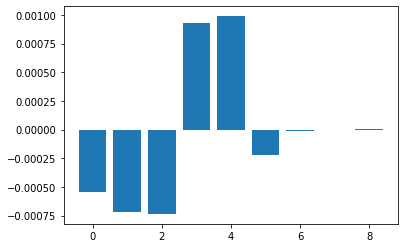

In [8]:
plt.bar(range(9), h)

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA Random Forest

In [2]:
x, y, z, h = RandomForest (10, 0.7)

In [3]:
x

array([0.42994688, 0.43492696, 0.40438247, 0.43293493, 0.42994688,
       0.42297477, 0.42231076, 0.43293493, 0.4309429 , 0.42297477])

In [4]:
y

0.42642762284196545

In [5]:
z

array([[0.13423127, 0.25277609, 0.25292184, 0.16817965, 0.07390958,
        0.03453853, 0.04081396, 0.04142611, 0.00120296],
       [0.1467819 , 0.24371109, 0.21529164, 0.17898022, 0.06537243,
        0.04448703, 0.05002188, 0.05433346, 0.00102036],
       [0.09220838, 0.25456407, 0.26090406, 0.1992461 , 0.06132635,
        0.03845251, 0.04731675, 0.04502102, 0.00096076],
       [0.14040107, 0.27412513, 0.19470944, 0.19715962, 0.06607971,
        0.03982717, 0.04460765, 0.04196917, 0.00112104],
       [0.11940213, 0.23629209, 0.25588842, 0.19783772, 0.06319859,
        0.0379866 , 0.04455437, 0.04372482, 0.00111526],
       [0.12865649, 0.23160209, 0.26253286, 0.17330153, 0.07213813,
        0.04574303, 0.04463045, 0.04026426, 0.00113116],
       [0.12191665, 0.18840855, 0.28374936, 0.19460894, 0.07399158,
        0.03610943, 0.04508998, 0.05507498, 0.00105052],
       [0.12394415, 0.27799197, 0.23485786, 0.17410328, 0.06778783,
        0.04538251, 0.03646318, 0.0386009 , 0.00086832],


In [6]:
h

array([0.12724545, 0.24353353, 0.24805989, 0.18390039, 0.06839735,
       0.04007339, 0.04324056, 0.04448039, 0.00106904])

<BarContainer object of 9 artists>

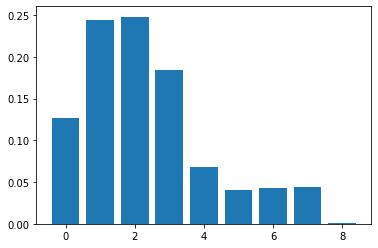

In [8]:
plt.bar(range(9),h)

<font color = 'blue'>
    Ici on regarde les résutats du gradient boosting

In [4]:
x, y, z, h = GradientBoosting (10, 0.7)

['Unnamed: 0', 'sender_id', 'receiver_id', 'receveur_potentiel', 'passe', 'passe_id', 'score1_distance', 'score2', 'score3', 'score4', 'premiere_distance_receveur', 'seconde_distance_receveur', 'premiere_distance_sender', 'seconde_distance_sender', 'distance_ligne_passe', 'adversaire_dans_cone', 'Direction_Passe']


In [5]:
x

array([0.42994688, 0.44588313, 0.43293493, 0.42928287, 0.43957503,
       0.42861886, 0.42397078, 0.43957503, 0.43791501, 0.42231076])

In [6]:
y

0.43300132802124836

In [7]:
z

array([[0.14193701, 0.15791875, 0.20206623, 0.10685314, 0.20945409,
        0.07622597, 0.10001615, 0.00552865, 0.        ],
       [0.13265666, 0.15565846, 0.23236575, 0.09612384, 0.17890249,
        0.10259279, 0.09640361, 0.0052964 , 0.        ],
       [0.11963871, 0.11700009, 0.23594056, 0.12947542, 0.17707977,
        0.1094564 , 0.10779793, 0.00361112, 0.        ],
       [0.11579392, 0.11714401, 0.2660712 , 0.10249376, 0.18768636,
        0.11419776, 0.09075554, 0.00585745, 0.        ],
       [0.15012864, 0.12996947, 0.19853021, 0.11312885, 0.2052874 ,
        0.10285868, 0.09191334, 0.00521016, 0.00297324],
       [0.14216394, 0.13448555, 0.19379974, 0.15291286, 0.18128756,
        0.0947267 , 0.0958124 , 0.00371454, 0.0010967 ],
       [0.1462328 , 0.1714758 , 0.17099725, 0.10415196, 0.18715449,
        0.10561756, 0.10615389, 0.00599142, 0.00222483],
       [0.1306091 , 0.13809358, 0.20569386, 0.0867139 , 0.23545281,
        0.10218335, 0.0989478 , 0.0023056 , 0.        ],


In [8]:
h

array([0.13254757, 0.1460235 , 0.21104062, 0.11225704, 0.19578613,
       0.09881438, 0.09806672, 0.00483456, 0.00062948])

<BarContainer object of 9 artists>

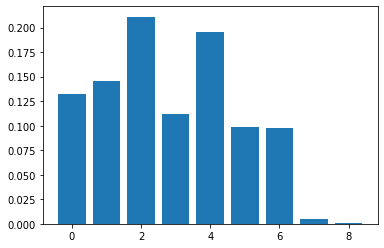

In [9]:
plt.bar(range(9),h)